<a href="https://colab.research.google.com/github/Vicente-Hernandez/Demo-Graphos-en-Python/blob/main/04_Demo_grafos_en_python_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grafos en Python

Un grafo es una estructura de datos que representa conexiones entre entidades. Cada nodo (o vértice) se puede conectar a otros mediante aristas (o enlaces).

## ¿Dónde se usan los grafos?
**Casos de uso típicos:**
- Mapas y rutas de navegación
- Redes sociales (usuarios conectados)
- Redes neuronales
- Sistemas de recomendación
- Relaciones en bases de datos

## Representación de un grafo no dirigido
Usamos un diccionario de listas de adyacencia, donde cada clave es un nodo y su valor es la lista de nodos conectados.

In [ ]:
grafo = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Mostrar conexiones del nodo A
print("Vecinos de A:", grafo['A'])

Vecinos de A: ['B', 'C']


## Recorrido en profundidad (DFS)
Visita un nodo, luego recursivamente a sus vecinos no visitados.

In [ ]:
def dfs(grafo, nodo, visitado=None):
    if visitado is None:
        visitado = set()
    if nodo not in visitado:
        print(nodo)
        visitado.add(nodo)
        for vecino in grafo[nodo]:
            dfs(grafo, vecino, visitado)

print("DFS desde A:")
dfs(grafo, 'A')

DFS desde A:
A
B
D
E
F
C


## Ejercicio guiado: Red social
Representa una red social donde cada usuario está conectado con sus amigos. Usa claves como nombres y listas de amigos como valores.

## Reflexión
- ¿Cómo puede ayudar un grafo en una red de transporte?
- ¿Qué diferencia hay entre un grafo dirigido y uno no dirigido?
- ¿Cuándo usarías pesos en las aristas?

Los grafos permiten modelar relaciones complejas y son esenciales en estructuras modernas como redes de datos o algoritmos de búsqueda.

## Visualización de grafos con `networkx`
Para representar visualmente un grafo, puedes usar la librería `networkx` junto con `matplotlib`. Esto permite ver las conexiones entre nodos de forma clara y atractiva.

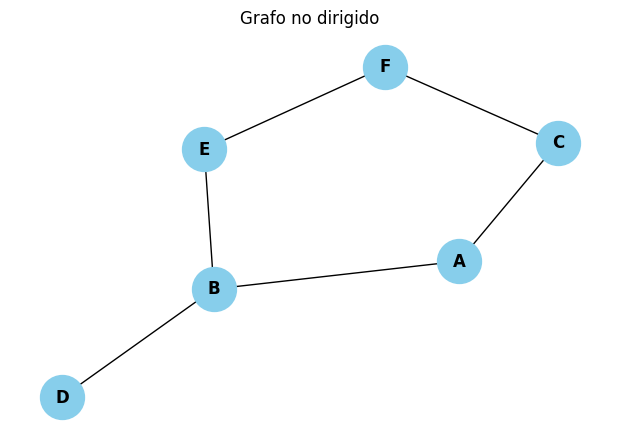

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo y agregar nodos/aristas
G = nx.Graph()
G.add_edges_from([
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'D'),
    ('B', 'E'),
    ('C', 'F'),
    ('E', 'F')
])

# Dibujar el grafo
plt.figure(figsize=(6, 4))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, font_weight='bold')
plt.title("Grafo no dirigido")
plt.show()

## Tipos de grafos
### Grafo dirigido
Un **grafo dirigido** (o *digraph*) es aquel en el que las aristas tienen una dirección. Se representa con flechas que indican de qué nodo a qué nodo va la conexión.

Se define en `networkx` usando:
```python
G = nx.DiGraph()
```

### Grafo cíclico y acíclico
- Un **grafo cíclico** contiene al menos un camino que regresa al mismo nodo (un ciclo).
- Un **grafo acíclico** no tiene ciclos. Un tipo especial de grafo acíclico dirigido se llama **DAG** (*Directed Acyclic Graph*), muy utilizado en compiladores, planificación de tareas y flujos de datos.

## Casos de uso de grafos dirigidos, cíclicos y acíclicos

### Grafos Dirigidos (Digraphs)
Las conexiones tienen una dirección.

**Casos de uso:**
- Redes de transporte con calles unidireccionales.
- Flujos de datos entre microservicios.
- Tareas que deben seguir un orden específico (compilación, flujos de trabajo).
- Redes neuronales (ANNs).

### Grafos Cíclicos
Contienen al menos un ciclo (una vuelta completa a un nodo).

**Casos de uso:**
- Redes sociales con conexiones mutuas.
- Sistemas con retroalimentación o feedback loops.
- Red de caminos turísticos.
- Protocolos de comunicación en red con rutas alternativas.

### Grafos Acíclicos (DAGs)
No contienen ciclos. Usados cuando se requiere un orden jerárquico o sin retorno.

**Casos de uso:**
- Flujos ETL o pipelines de datos.
- Programación de tareas paralelas (ej. en Spark o Airflow).
- Versionamiento de datos.
- Redes bayesianas en probabilidades.
- Construcción de proyectos con dependencias (sistemas tipo `make`).

## Contenido avanzado: Cálculo de rutas con grafos dirigidos y ponderados
En aplicaciones como **Google Maps** o **Waze**, se utilizan **grafos dirigidos con pesos** para modelar calles y calcular rutas óptimas.

- Cada **nodo** representa una intersección o punto del mapa.
- Cada **arista dirigida** representa una calle con una dirección.
- Cada arista tiene un **peso** que representa tiempo estimado, distancia, congestión, etc.

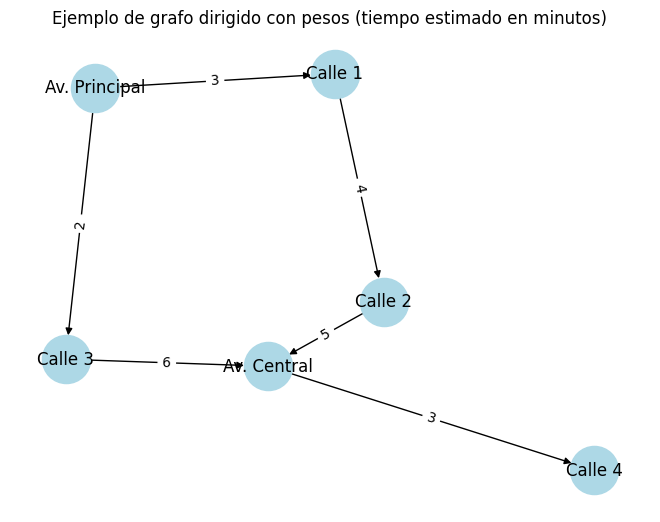

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar calles como aristas con pesos (tiempo en minutos)
G.add_weighted_edges_from([
    ("Av. Principal", "Calle 1", 3),
    ("Calle 1", "Calle 2", 4),
    ("Calle 2", "Av. Central", 5),
    ("Av. Principal", "Calle 3", 2),
    ("Calle 3", "Av. Central", 6),
    ("Av. Central", "Calle 4", 3)
])

# Dibujar grafo con pesos
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1200, node_color="lightblue", arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Ejemplo de grafo dirigido con pesos (tiempo estimado en minutos)")
plt.show()

Este ejemplo simula una red de calles donde el sistema de navegación puede calcular cuál es la ruta más rápida desde una calle de origen hasta una de destino.

Se podrían aplicar algoritmos como **Dijkstra** o **A\*** sobre este grafo para determinar el camino óptimo según el peso de las aristas.